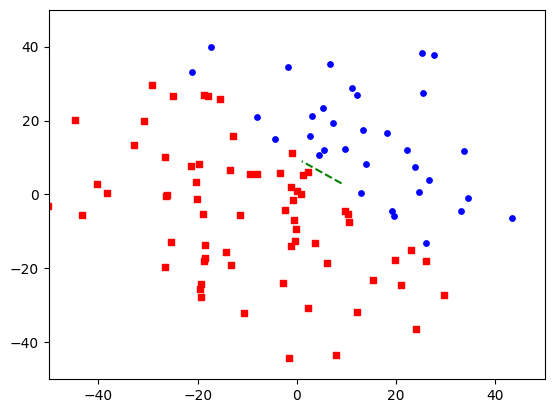

In [53]:
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt

#Dimensions, Number of training points
d, N = 2, 100

def generate_data(dimension, quantity):
  std = 20
  return std * np.random.randn(quantity, dimension)

def sign(data):
  s = np.asarray(np.sign(data), dtype=int)
  # The function np.sign return 0 for 0, change it to 1
  s[s == 0] = 1
  return s

def generate_label(data):
  return sign(data[:, 1] + data[:, 0] - 10.5)

def plot_data(data, label):
  transpose_data = data.T

  plt.scatter(transpose_data[0][label[:] == 1], transpose_data[1][label[:] == 1], marker = 'o', c = 'b', s = 15)
  plt.scatter(transpose_data[0][label[:] == -1], transpose_data[1][label[:] == -1], marker = 's', c = 'r', s = 15)

data = generate_data(d, N)
y = generate_label(data)
plot_data(data, y)

plt.plot([9, 1], [3, 9], ls='--', color='g');
plt.xlim(-50, 50); plt.ylim(-50, 50);
plt.show()

In [59]:
def initialize_weights(dimension):
  return np.random.randn(dimension + 1)

def find_misclassified(label, X, w):
  #The np.where returns a tuple but we just need to get the np.array from it
  return np.where(np.dot(X, w) * label < 0)[0]

def perceptron_learning(label, X):
  w = initialize_weights(d)
  #Add the additional vector ones to the feature matrix
  X = np.concatenate((data, np.ones((N, 1))), axis = 1)

  iter = 0
  while True:
    mis_index = find_misclassified(label, X, w)

    iter += 1
    if not mis_index.shape[0]: #If there were no other misclassified points
      print(iter)
      return w

    chosen_one = np.random.choice(mis_index, 1)[0] #Choose a random misclassificed point from the misclassified set

    w = w + label[chosen_one] * X[chosen_one]

431
[  26.57165213   26.82180323 -276.61086313]
[-50  50] [ 59.84659031 -39.22076879]


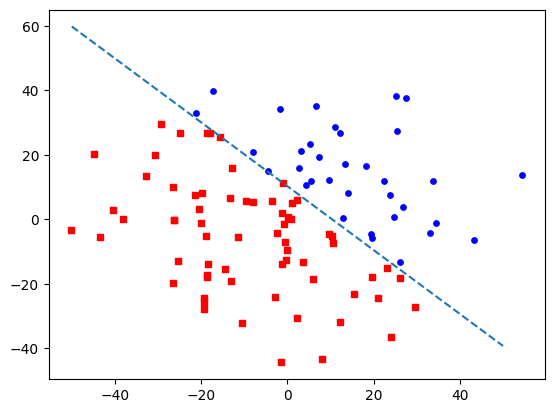

In [66]:
w = perceptron_learning(y, data)
print(w)

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    x = np.array([-50, 50])
    y = -(intercept * np.ones(d) + slope[0] * x)/slope[1]
    print(x,y)
    plt.plot(x, y, '--')

abline(w[:-1], w[-1])
plot_data(data, y)
plt.show()